#               Forearm Keypoint Detection

## Importing Libraries and models

In [ ]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2
from keras.models import load_model
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from skimage.transform import resize

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.16) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [ ]:
model = load_model('Keypoints-model.h5')


2023-06-28 12:25:35.350210: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-06-28 12:25:35.350232: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-06-28 12:25:35.350238: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-06-28 12:25:35.350580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 12:25:35.350596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
import cv2
tl = (70, 0)
bl = (0, 800)
tr = (250, 0)
br = (320, 800)
pts1 = np.float32([tl, bl, tr, br])
threshold = 0.5




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def convert_tattoo_to_rgba(image_array, alpha=255):
    # Check if the input image is already in RGBA format
    if image_array.shape[2] == 4:
        return image_array

    # Create an alpha channel with the specified value
    alpha_channel = np.full((image_array.shape[0], image_array.shape[1], 1), alpha, dtype=np.uint8)

    # Identify white pixels
    white_pixels = np.all(image_array == [1., 1., 1.], axis=-1)
    black_pixels = np.all(image_array == [0., 0., 0.], axis=-1)

    # Set alpha to 0 for white pixels
    alpha_channel[white_pixels] = 0
    alpha_channel[black_pixels] = int(0.8 * alpha)

    # Concatenate the alpha channel with the RGB image
    rgba_array = np.concatenate((image_array, alpha_channel), axis=2)

    return rgba_array


In [ ]:
def overlay_images(background, overlay):
    # Create a copy of the background image to modify
    result = background.copy()

    # Resize the overlay image to match the background shape
    overlay_resized = overlay[:background.shape[0], :background.shape[1]]

    # Normalize the alpha values to range between 0 and 1
    overlay_alpha = overlay_resized[..., 3] / 255.0

    # Compute the weighted overlay using alpha blending
    result_alpha = 1 - (1 - overlay_alpha) * (1 - result[..., 3] / 255.0)
    result_alpha = np.clip(result_alpha, 0, 1)

    result[..., :3] = overlay_alpha[..., None] * overlay_resized[..., :3] + (1 - overlay_alpha[..., None]) * result[..., :3]
    result[..., 3] = result_alpha * 255

    return result


In [ ]:

# Define the crop function
def crop_image(image, new_shape):
    current_shape = image.shape
    y_start = (current_shape[0] - new_shape[0]) // 2
    y_end = y_start + new_shape[0]
    x_start = (current_shape[1] - new_shape[1]) // 2
    x_end = x_start + new_shape[1]
    cropped_image = image[y_start:y_end, x_start:x_end, :]
    return cropped_image


## Rose preprocessing

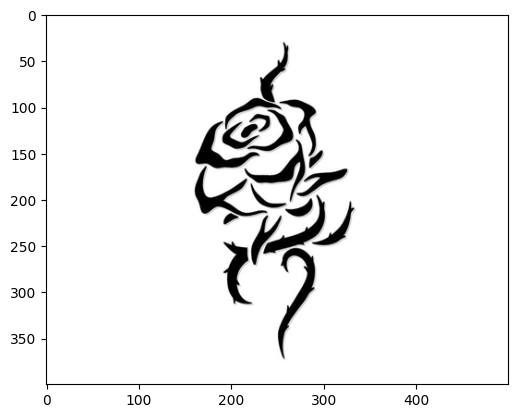

In [ ]:
from PIL import Image
import numpy as np

# Load the tattoo image
tattoo_image = Image.open("rose.jpg")

width = 500 #change these values for preferred size 
height = 400

scaled_tattoo = tattoo_image.resize((width,height))
# plt.imshow(scaled_tattoo)

In [ ]:

# Create a white background image
background_color = (255, 255, 255)  # White color in RGB
background_image = Image.new("RGB", (400, 800), background_color)

# Create a blank canvas with the desired dimensions
canvas = Image.new("RGB", (400, 800), background_color)

# Calculate the position to place the image at the center of the canvas
x = (canvas.width - scaled_tattoo.width) // 2
y = (canvas.height - scaled_tattoo.height) // 2

# Overlay the image onto the canvas using PIL
canvas.paste(scaled_tattoo, (x, y))

# Convert the final image to a NumPy array
image_array = np.array(canvas)


In [ ]:
from skimage.transform import resize

# Ensure image is within [0, 1] range
image_array = image_array / 255.0

resized_image = resize(image_array, (800, 320, 3), mode='constant')

# If you want to display or save the image using cv2 or matplotlib, you might need to scale it back to [0, 255]



In [ ]:
# Define the threshold value

# Binarize the image array
Rose = np.where(resized_image > threshold, 0., 1.)


## Star preprocessing

True

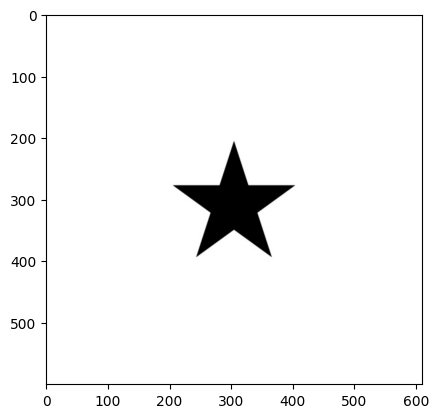

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("star.jpg")

# Define the desired padding sizes
padding_top_bottom = 200  # in pixels
padding_left_right = 200  # in pixels

# Calculate the new dimensions
new_height = image.shape[0] + 2 * padding_top_bottom
new_width = image.shape[1] + 2 * padding_left_right

# Create a new canvas with white background
new_image = np.ones((new_height, new_width, 3), dtype=np.uint8) * 255

# Calculate the starting positions for copying the image
start_x = padding_left_right
start_y = padding_top_bottom

# Copy the original image to the center of the new canvas
new_image[start_y:start_y+image.shape[0], start_x:start_x+image.shape[1]] = image
plt.imshow(new_image)

# Save the padded image
cv2.imwrite("Pstar.jpg", new_image)


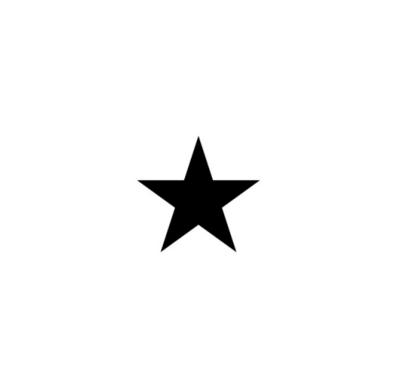

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the tattoo image
tattoo_image = Image.open("Pstar.jpg")

# Define the desired width and height
width = 500  # Change these values for your preferred size
height = 400

# Calculate the aspect ratio of the original image
aspect_ratio = tattoo_image.width / tattoo_image.height

# Calculate the new height based on the aspect ratio
new_height = int(width / aspect_ratio)

# Resize the image while maintaining the aspect ratio
scaled_tattoo = tattoo_image.resize((width, new_height))

# Display the resized image
plt.imshow(scaled_tattoo)
plt.axis('off')
plt.show()


In [ ]:
# from PIL import Image
# import numpy as np

# # Load the tattoo image
# tattoo_image = Image.open("star.jpg")

# width = 400 #change these values for preferred size 
# height = 400

# scaled_tattoo = tattoo_image.resize((width,height))
# plt.imshow(scaled_tattoo)

In [ ]:

# Create a white background image
background_color = (255, 255, 255)  # White color in RGB
background_image = Image.new("RGB", (400, 800), background_color)

# Create a blank canvas with the desired dimensions
canvas = Image.new("RGB", (400, 800), background_color)

# Calculate the position to place the image at the center of the canvas
x = (canvas.width - scaled_tattoo.width) // 2
y = (canvas.height - scaled_tattoo.height) // 2

# Overlay the image onto the canvas using PIL
canvas.paste(scaled_tattoo, (x, y))

# Convert the final image to a NumPy array
image_array = np.array(canvas)


In [ ]:
from skimage.transform import resize

# Ensure image is within [0, 1] range
image_array = image_array / 255.0

resized_image = resize(image_array, (800, 320, 3), mode='constant')

# If you want to display or save the image using cv2 or matplotlib, you might need to scale it back to [0, 255]



In [ ]:
# Define the threshold value

# Binarize the image array
Star = np.where(resized_image > threshold, 0., 1.)


## Running the inference

In [ ]:

# Create a VideoCapture object
cap = cv2.VideoCapture(2)  # 0 is usually the built-in webcam
# codec = 0x47504A4D  # MJPG
# camera.set(cv2.CAP_PROP_FPS, 30.0)
# camera.set(cv2.CAP_PROP_FOURCC, codec)
# camera.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# camera.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)


try:
    while True:
        # Read a frame from the camera
        ret, frame = cap.read()

        # If frame is read correctly, ret is True
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Convert the frame to PIL Image
        img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Resize the frame
        new_height = 1280
        aspect_ratio = img.size[0] / img.size[1]  # PIL Image.size is in (width, height) format
        new_width = round(new_height * aspect_ratio)
        img = img.resize((new_width, new_height))

        # Convert PIL Image back to NumPy array
        resized_frame = np.array(img)

        # Crop the frame to the required size
        cropped_frame = crop_image(resized_frame, (1280, 720, 3))
        cropped_np = np.array(cropped_frame) #convert to np array
        resized_pre_image = resize(cropped_np, (160, 90, 3), mode='constant')
        image_batch = np.expand_dims(resized_pre_image, axis=0)
        # add an extra dimension for the batch
        image_batch = np.expand_dims(resized_pre_image, axis=0)
# ... Your previous code up to model.predict ...

        predictions = model.predict(image_batch)





        # Reshape the predicted keypoints array to a (4, 2) matrix
        predicted_keypoints = predictions.reshape((4, 2))

        pts2 = np.float32([[predicted_keypoints[0][0], predicted_keypoints[0][1]], [predicted_keypoints[3][0], predicted_keypoints[3][1]], [predicted_keypoints[1][0], predicted_keypoints[1][1]], [predicted_keypoints[2][0], predicted_keypoints[2][1]]])

        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        transformed_frame = cv2.warpPerspective(Star, matrix, (720, 1280))
        new_one = np.where(transformed_frame > threshold, 0., 1.) ##invert colours
        image_with_alpha = convert_tattoo_to_rgba(new_one)


        # Convert the keypoints to integers
        predicted_keypoints = predicted_keypoints.astype(int)
        cropped_frame_rgb = cv2.cvtColor(cropped_frame, cv2.COLOR_RGB2BGR)


        # Copy the frame so you don't modify the original
        drawn_frame = cropped_frame_rgb.copy()
        drawn_frames = convert_tattoo_to_rgba(drawn_frame)
        overlaid_image = overlay_images(drawn_frames, image_with_alpha)



        # Plot the keypoints
        for i in range(predicted_keypoints.shape[0]):
            x = predicted_keypoints[i][0]
            y = predicted_keypoints[i][1]
            if x < 0:
                x = 0
            if y < 0:
                y = 0

            cv2.circle(overlaid_image, (x, y), radius=10, color=(0, 255, 0), thickness=-1)

        # Display the resulting frame
        cv2.imshow('frame', overlaid_image)

        # Wait for the user to press 'q' key to stop the loop
        if cv2.waitKey(1) == ord('q'):
            break
finally:
    # Release the VideoCapture object and close windows
    cap.release()
    cv2.destroyAllWindows()

Asked for all format descriptions...
[setting] Setting kCMIODevicePropertyDeviceMaster to 40109
[setting] Setting kCMIOStreamPropertyFormatDescription
Got new format : 1920x1080
Asked for all format descriptions...
[setting] Setting kCMIODevicePropertyDeviceMaster to -1
[setting] Setting kCMIODevicePropertyDeviceMaster to 40109
[setting] Setting kCMIODevicePropertyDeviceMaster to -1
Asked for all format descriptions...
1/1 [==============================] - 0s 12ms/step
[RemoteFrameSource] Releasing RemoteFrameSource


KeyboardInterrupt: 

In [ ]:
# Create a VideoCapture object
cap = cv2.VideoCapture(2)  # 0 is usually the built-in webcam

try:
    while True:
        # Read a frame from the camera
        ret, frame = cap.read()

        # If frame is read correctly, ret is True
        if not ret:
            print("Can't receive frame. Exiting ...")
            break

        # Convert the frame to PIL Image
        img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Resize the frame
        new_height = 1280
        aspect_ratio = img.size[0] / img.size[1]  # PIL Image.size is in (width, height) format
        new_width = round(new_height * aspect_ratio)
        img = img.resize((new_width, new_height))

        # Convert PIL Image back to NumPy array
        resized_frame = np.array(img)

        # Crop the frame to the required size
        cropped_frame = crop_image(resized_frame, (1280, 720, 3))
        cropped_np = np.array(cropped_frame) #convert to np array
        resized_pre_image = resize(cropped_np, (160, 90, 3), mode='constant')
        image_batch = np.expand_dims(resized_pre_image, axis=0)
        # add an extra dimension for the batch
        image_batch = np.expand_dims(resized_pre_image, axis=0)

        predictions = model.predict(image_batch)

        # Reshape the predicted keypoints array to a (4, 2) matrix
        predicted_keypoints = predictions.reshape((4, 2))

        pts2 = np.float32([[predicted_keypoints[0][0], predicted_keypoints[0][1]], [predicted_keypoints[3][0], predicted_keypoints[3][1]], [predicted_keypoints[1][0], predicted_keypoints[1][1]], [predicted_keypoints[2][0], predicted_keypoints[2][1]]])

        matrix = cv2.getPerspectiveTransform(pts1, pts2)

        key = cv2.waitKey(1)
        if key == ord('1'):
            transformed_frame = cv2.warpPerspective(Star, matrix, (720, 1280))
        elif key == ord('2'):
            transformed_frame = cv2.warpPerspective(Rose, matrix, (720, 1280))

        new_one = np.where(transformed_frame > threshold, 0., 1.) ##invert colours
        image_with_alpha = convert_tattoo_to_rgba(new_one)

        # Convert the keypoints to integers
        predicted_keypoints = predicted_keypoints.astype(int)
        cropped_frame_rgb = cv2.cvtColor(cropped_frame, cv2.COLOR_RGB2BGR)

        # Copy the frame so you don't modify the original
        drawn_frame = cropped_frame_rgb.copy()
        drawn_frames = convert_tattoo_to_rgba(drawn_frame)
        overlaid_image = overlay_images(drawn_frames, image_with_alpha)

        # Plot the keypoints
        for i in range(predicted_keypoints.shape[0]):
            x = predicted_keypoints[i][0]
            y = predicted_keypoints[i][1]
            if x < 0:
                x = 0
            if y < 0:
                y = 0

            cv2.circle(overlaid_image, (x, y), radius=10, color=(0, 255, 0), thickness=-1)

        # Display the resulting frame
        cv2.imshow('frame', overlaid_image)

        # Wait for the user to press 'q' key to stop the loop
        if key == ord('q'):
            break
finally:
    # Release the VideoCapture object and close windows
    cap.release()
    cv2.destroyAllWindows()


Asked for all format descriptions...
[setting] Setting kCMIODevicePropertyDeviceMaster to 40109
[setting] Setting kCMIOStreamPropertyFormatDescription
Got new format : 1920x1080
Asked for all format descriptions...
[setting] Setting kCMIODevicePropertyDeviceMaster to -1
[setting] Setting kCMIODevicePropertyDeviceMaster to 40109
[setting] Setting kCMIODevicePropertyDeviceMaster to -1
Asked for all format descriptions...
1/1 [==============================] - 0s 12ms/step
[RemoteFrameSource] Releasing RemoteFrameSource


KeyboardInterrupt: 